In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### # 특이사항 메모



---

### 주제1 - 날짜별 가격변화를 예측?

##### 데이터 구조 탐색

- 날짜별 가격변화를 예측하면 성수기 여부에 따른 가격을 예측 가능

In [ ]:
# 날짜별 정보

df_calendar = pd.read_csv('./data/calendar.csv.gz', compression='gzip')

In [ ]:
# .info()를 통해 '숙소 고유 식별번호', '날짜', '가격', '가격 변동'등이 존재 함을 확인

df_calendar.info()

_="""
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8306219 entries, 0 to 8306218
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64      # 👈 숙소 고유 식별번호
 1   date            object     # 👈 날짜
 2   available       object     # 예약 가능 여부
 3   price           object     # 👈 가격
 4   adjusted_price  float64    # 👈 할인이나 프로모션 등이 적용된 가격
 5   minimum_nights  float64    # 해당 날짜에 숙소를 예약하기 위해 필요한 최소 숙박 일수
 6   maximum_nights  float64    # 해당 날짜에 숙소를 예약할 수 있는 최대 숙박 일수
dtypes: float64(3), int64(1), object(3)
memory usage: 443.6+ MB
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8306219 entries, 0 to 8306218
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  float64
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 443.6+ MB


In [122]:
# 컬럼 'df_calendar['price']'가 object 타입이고 실제 데이터가 '$4,725.00' 와 같이 들어 있음을 발견하려 float형 컬럼 추가

# 'price_float' 컬럼에서 '$'와 ',' 제거
df_calendar['price_float'] = df_calendar['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# 컬럼 타입 변경
df_calendar['price_float'] = df_calendar['price_float'].astype(float)

In [123]:
# df_calendar.loc[df_calendar['listing_id'] == 197677].describe()
# 가격변화를 보기위해 숙소 최빈값을 검색

print(df_calendar['listing_id'].mode())
_="""결과
0                 4690684       # 👈 분석대상
1                 5738050       # 👈 분석대상
...
51    1342364577456789638
Name: listing_id, dtype: int64
"""

0                 4690684
1                 5738050
2                20322003
3                21182191
4                21870758
5                24144270
6                24741674
7                26435084
8                27530652
9                27769143
10               31994933
11               38563908
12               40379236
13               47861822
14               49296349
15               50715997
16     856714558033099498
17     865509902525963114
18     868327673867124553
19     872857143028157696
20     893786418066007577
21     930219393111474663
22     961147608137376961
23     963445812457611955
24    1031452192360404362
25    1105511474523738748
26    1115761769724948614
27    1122232739008514767
28    1125252564888591350
29    1133792627525437313
30    1135026834594189010
31    1151234958270624651
32    1159451617920129364
33    1165708050388521668
34    1196706320307722876
35    1201111089645221950
36    1206545502298065893
37    1224590507419099170
38    123113

In [124]:
# 최빈값 2개에 대하여 ".describe()" 실행했지만 가격 변동이 없었음

df_calendar.loc[df_calendar['listing_id'] == 4690684].describe()

df_calendar.loc[df_calendar['listing_id'] == 5738050].describe()

_="""                                                                  [👇]
       listing_id  adjusted_price  minimum_nights  maximum_nights  price_float
count       366.0             0.0           365.0           365.0        366.0
mean    4690684.0             NaN            14.0           120.0       4725.0
std           0.0             NaN             0.0             0.0          0.0
min     4690684.0             NaN            14.0           120.0       4725.0
25%     4690684.0             NaN            14.0           120.0       4725.0
50%     4690684.0             NaN            14.0           120.0       4725.0
75%     4690684.0             NaN            14.0           120.0       4725.0
max     4690684.0             NaN            14.0           120.0       4725.0
       listing_id  adjusted_price  minimum_nights  maximum_nights  price_float
count       366.0             0.0           365.0           365.0        366.0
mean    5738050.0             NaN             3.0          1125.0       5500.0
std           0.0             NaN             0.0             0.0          0.0
min     5738050.0             NaN             3.0          1125.0       5500.0
25%     5738050.0             NaN             3.0          1125.0       5500.0
50%     5738050.0             NaN             3.0          1125.0       5500.0
75%     5738050.0             NaN             3.0          1125.0       5500.0
max     5738050.0             NaN             3.0          1125.0       5500.0
"""

##### 주제1 - 결론
- 불가 판단 데이터셋을 변경

---

### 주제2 - 숙소의 여러 조건에 따른 숙소 가격 예측

##### # 1. 데이터 로드

In [ ]:

df_listings = pd.read_csv('./data/listings.csv.gz', compression='gzip')

##### # 2. 데이터 구조 및 기초 통계 확인

In [126]:
# 데이터 구조 분석
df_listings.info()

_="""
데이터 총: 25,297
컬럼 총: 79개
"""

# df_listings.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25297 entries, 0 to 25296
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            25297 non-null  int64  
 1   listing_url                                   25297 non-null  object 
 2   scrape_id                                     25297 non-null  int64  
 3   last_scraped                                  25297 non-null  object 
 4   source                                        25297 non-null  object 
 5   name                                          25297 non-null  object 
 6   description                                   24879 non-null  object 
 7   neighborhood_overview                         14048 non-null  object 
 8   picture_url                                   25297 non-null  object 
 9   host_id                                       25297 non-null 

In [127]:
# 전체 컬럼 리스트
# 회의롤 통해 1차적으로 필요/불필요 컬럼을 구별
# 주석처리 = 필요한 컬럼

drop_list = [
'id',	                                        # 각 숙소의 고유 식별자.
'listing_url',	                                # 숙소의 웹페이지 URL.
'scrape_id',	                                # 데이터 스크래핑 작업의 고유 식별자.
'last_scraped',	                                # 숙소 정보가 마지막으로 스크래핑된 날짜.
'source',	                                    # 숙소 정보의 출처.
'name',	                                        # 숙소의 이름.
'description',	                                # 숙소에 대한 상세 설명.
'neighborhood_overview',	                    # 숙소 주변 지역에 대한 설명.
'picture_url',	                                # 숙소 대표 사진의 URL.
'host_id',	                                    # 호스트의 고유 식별자.
'host_url',	                                    # 호스트의 웹페이지 URL.
'host_name',	                                # 호스트의 이름.
'host_since',	                                # 호스트가 에어비앤비에 가입한 날짜.
'host_location',	                            # 호스트의 위치.
'host_about',	                                # 호스트에 대한 자기소개.
'host_response_time',	                        # 호스트의 평균 응답 시간.
'host_response_rate',	                        # 호스트의 응답률.
'host_acceptance_rate',	                        # 호스트의 예약 수락률.
'host_is_superhost',	                        # 호스트가 슈퍼호스트인지 여부.
'host_thumbnail_url',	                        # 호스트 프로필 썸네일 이미지의 URL.
'host_picture_url',	                            # 호스트 프로필 사진의 URL.
'host_neighbourhood',	                        # 호스트가 거주하는 지역.
'host_listings_count',	                        # 해당 호스트가 보유한 전체 숙소 수.
'host_total_listings_count',	                # 해당 호스트가 소유하거나 관리하는 전체 숙소 수.
'host_verifications',	                        # 호스트의 인증 정보 목록.
'host_has_profile_pic',	                        # 호스트가 프로필 사진을 가지고 있는지 여부.
'host_identity_verified',	                    # 호스트 신원이 인증되었는지 여부.
'neighbourhood',	                            # 숙소가 위치한 지역의 이름.

# 'neighbourhood_cleansed',	                    # 정제된 숙소 지역 이름.

'neighbourhood_group_cleansed',	                # 정제된 숙소 지역 그룹 이름.

# 'latitude',	                                    # 숙소의 위도.
# 'longitude',	                                # 숙소의 경도.
# 'property_type',	                            # 숙소의 종류.
# 'room_type',	                                # 숙소의 방 유형.
# 'accommodates',	                                # 숙소가 수용 가능한 최대 인원 수.
# 'bathrooms',	                                # 숙소의 욕실 개수.

'bathrooms_text',	                            # 숙소의 욕실 개수를 설명하는 텍스트.

# 'bedrooms',	                                    # 숙소의 침실 개수.
# 'beds',	                                        # 숙소의 침대 개수.
# 'amenities',	                                # 숙소에 제공되는 편의 시설 목록.
# 'price',	                                    # 숙소의 1박당 가격.

'minimum_nights',	                            # 최소 숙박 가능 일수.
'maximum_nights',	                            # 최대 숙박 가능 일수.
'minimum_minimum_nights',	                    # 호스트가 설정한 최소 숙박 일수 중 가장 낮은 값.
'maximum_minimum_nights',	                    # 호스트가 설정한 최소 숙박 일수 중 가장 높은 값.
'minimum_maximum_nights',	                    # 호스트가 설정한 최대 숙박 일수 중 가장 낮은 값.
'maximum_maximum_nights',	                    # 호스트가 설정한 최대 숙박 일수 중 가장 높은 값.
'minimum_nights_avg_ntm',	                    # 최소 숙박 일수의 평균값.
'maximum_nights_avg_ntm',	                    # 최대 숙박 일수의 평균값.
'calendar_updated',	                            # 달력이 마지막으로 업데이트된 시점.
'has_availability',	                            # 숙소 예약 가능 여부.
'availability_30',	                            # 향후 30일 동안의 숙소 예약 가능 일수.
'availability_60',	                            # 향후 60일 동안의 숙소 예약 가능 일수.
'availability_90',	                            # 향후 90일 동안의 숙소 예약 가능 일수.
'availability_365',	                            # 향후 365일 동안의 숙소 예약 가능 일수.
'calendar_last_scraped',	                    # 달력 정보가 마지막으로 스크래핑된 날짜.

# 'number_of_reviews',	                        # 총 리뷰 개수.
# 'number_of_reviews_ltm',	                    # 지난 12개월 동안의 리뷰 개수.
# 'number_of_reviews_l30d',	                    # 지난 30일 동안의 리뷰 개수.

'availability_eoy',	                            # 연말까지의 예약 가능 일수.

# 'number_of_reviews_ly',	                        # 지난 1년 동안의 리뷰 개수.

'estimated_occupancy_l365d',	                # 지난 365일 동안의 예상 점유율.
'estimated_revenue_l365d',	                    # 지난 365일 동안의 예상 수입.

# 'first_review',	                                # 첫 번째 리뷰가 작성된 날짜.
# 'last_review',	                                # 마지막 리뷰가 작성된 날짜.
# 'review_scores_rating',	                        # 총 리뷰 점수(별점)의 평균값.
# 'review_scores_accuracy',	                    # 정확도 리뷰 점수.
# 'review_scores_cleanliness',	                # 청결도 리뷰 점수.
# 'review_scores_checkin',	                    # 체크인 경험 리뷰 점수.
# 'review_scores_communication',	                # 소통 리뷰 점수.
# 'review_scores_location',	                    # 위치 리뷰 점수.
# 'review_scores_value',	                        # 가격 대비 가치 리뷰 점수.

'license',	                                    # 숙소의 라이선스 정보.
'instant_bookable',	                            # 즉시 예약이 가능한 숙소인지 여부.
'calculated_host_listings_count',	            # 호스트가 등록한 숙소 개수.
'calculated_host_listings_count_entire_homes',	# 호스트가 등록한 '전체 숙소/아파트' 유형의 개수.
'calculated_host_listings_count_private_rooms',	# 호스트가 등록한 '개인실' 유형의 개수.
'calculated_host_listings_count_shared_rooms',	# 호스트가 등록한 '공용 공간' 유형의 개수.
'reviews_per_month'	                            # 월별 평균 리뷰 개수.
]

# 불필요 컬럼 드롭 처리
df_listings = df_listings.drop(drop_list, axis=1)



In [128]:
# 남은 컬럼 확인
print(df_listings.columns)

_="""
neighbourhood_cleansed
latitude
longitude
property_type
room_type
accommodates
bathrooms
bedrooms
beds
amenities
price
number_of_reviews
number_of_reviews_ltm
number_of_reviews_l30d
number_of_reviews_ly
first_review
last_review
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value
"""

Index(['neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'amenities', 'price', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'number_of_reviews_ly', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'],
      dtype='object')


In [ ]:
df_listings.info()

_="""
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25297 entries, 0 to 25296
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   neighbourhood_cleansed       25297 non-null  object 
 1   latitude                     25297 non-null  float64
 2   longitude                    25297 non-null  float64
 3   property_type                25297 non-null  object 
 4   room_type                    25297 non-null  object 
 5   accommodates                 25297 non-null  int64  
 6   bathrooms                    23253 non-null  float64       👈 결측치 있음
 7   bedrooms                     25040 non-null  float64       👈 결측치 있음
 8   beds                         23255 non-null  float64       👈 결측치 있음
 9   amenities                    25297 non-null  object 
 10  price                        23260 non-null  object        👈 결측치 있음
 11  number_of_reviews            25297 non-null  int64  
 12  number_of_reviews_ltm        25297 non-null  int64  
 13  number_of_reviews_l30d       25297 non-null  int64  
 14  number_of_reviews_ly         25297 non-null  int64  
 15  first_review                 21724 non-null  object        👈 결측치 있음
 16  last_review                  21724 non-null  object        👈 결측치 있음
 17  review_scores_rating         21724 non-null  float64       👈 결측치 있음
 18  review_scores_accuracy       21720 non-null  float64       👈 결측치 있음
 19  review_scores_cleanliness    21720 non-null  float64       👈 결측치 있음
 20  review_scores_checkin        21720 non-null  float64       👈 결측치 있음
 21  review_scores_communication  21720 non-null  float64       👈 결측치 있음
 22  review_scores_location       21720 non-null  float64       👈 결측치 있음
 23  review_scores_value          21720 non-null  float64       👈 결측치 있음
dtypes: float64(12), int64(5), object(7)
memory usage: 4.6+ MB
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25297 entries, 0 to 25296
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   neighbourhood_cleansed       25297 non-null  object 
 1   latitude                     25297 non-null  float64
 2   longitude                    25297 non-null  float64
 3   property_type                25297 non-null  object 
 4   room_type                    25297 non-null  object 
 5   accommodates                 25297 non-null  int64  
 6   bathrooms                    23253 non-null  float64
 7   bedrooms                     25040 non-null  float64
 8   beds                         23255 non-null  float64
 9   amenities                    25297 non-null  object 
 10  price                        23260 non-null  object 
 11  number_of_reviews            25297 non-null  int64  
 12  number_of_reviews_ltm        25297 non-null  int64  
 13  number_of_review

### # 3. 결측치 및 이상치 탐색

In [ ]:
df_listings.isna().sum()

_="""
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                      2044     👈 결측치 있음
bedrooms                        257     👈 결측치 있음
beds                           2042     👈 결측치 있음
amenities                         0
price                          2037     👈 결측치 있음
number_of_reviews                 0
number_of_reviews_ltm             0
number_of_reviews_l30d            0
number_of_reviews_ly              0
first_review                   3573     👈 결측치 있음
last_review                    3573     👈 결측치 있음
review_scores_rating           3573     👈 결측치 있음
review_scores_accuracy         3577     👈 결측치 있음
review_scores_cleanliness      3577     👈 결측치 있음
review_scores_checkin          3577     👈 결측치 있음
review_scores_communication    3577     👈 결측치 있음
review_scores_location         3577     👈 결측치 있음
review_scores_value            3577     👈 결측치 있음
dtype: int64
"""

In [131]:
# 추적용 price_text 컬럼 생성
df_listings['price_text'] = df_listings['price']

# 'price_float' 컬럼에서 '$'와 ',' 제거
df_listings['price'] = df_listings['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# 컬럼 타입 변경
df_listings['price'] = df_listings['price'].astype(float)

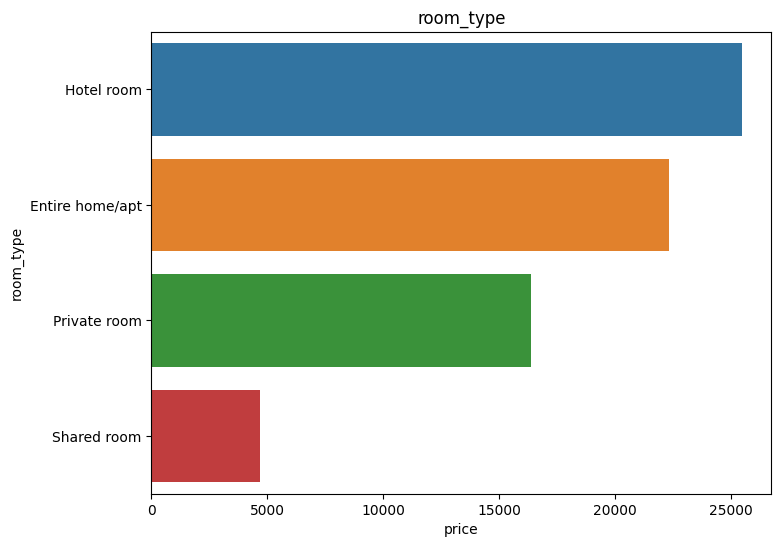

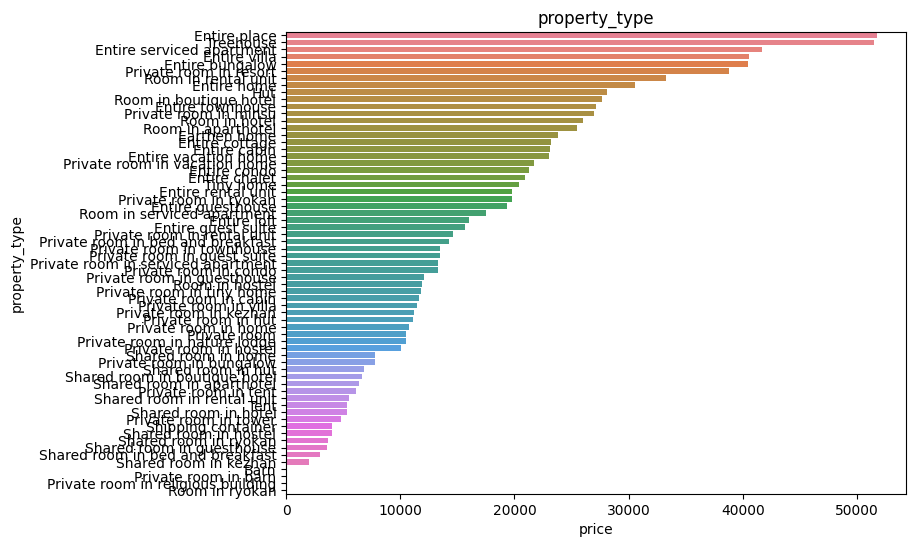

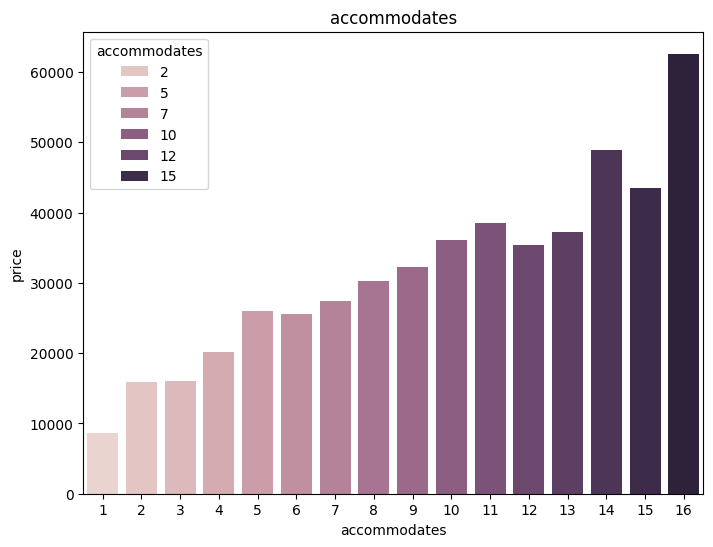

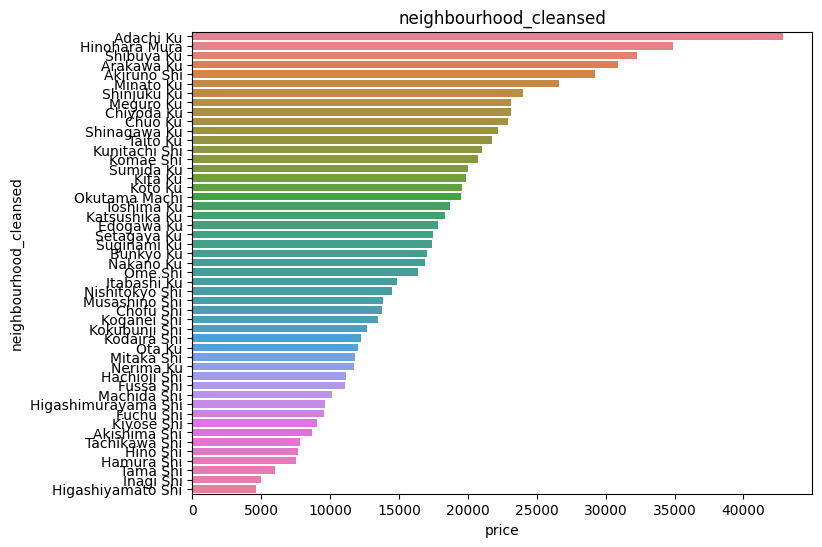

In [132]:
# price 결측치 처리를 위한 결측치가 없는 범례형

def show_plt(x, y, hue, title):
    plt.figure(figsize=(8,6))
    plt.title(title)
    sns.barplot(
        x=x,
        y=y,
        hue=hue
    )

rt_price = df_listings.groupby('room_type')['price'].mean().sort_values(ascending=False)
pt_price = df_listings.groupby('property_type')['price'].mean().sort_values(ascending=False)
acc_price = df_listings.groupby('accommodates')['price'].mean().sort_values(ascending=False)
nc_price = df_listings.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)

# rt_price.index

show_plt(rt_price, rt_price.index, rt_price.index, 'room_type')
show_plt(pt_price, pt_price.index, pt_price.index, 'property_type')
show_plt(acc_price.index, acc_price, acc_price.index, 'accommodates')
show_plt(nc_price, nc_price.index, nc_price.index, 'neighbourhood_cleansed')

In [133]:
# isna_cnt1 = df_listings['price'].isna().sum()
# print('결측치',isna_cnt1, '개 ')

groupby_columns = [
    ['room_type', 'property_type', 'accommodates', 'neighbourhood_cleansed'],
    ['room_type', 'property_type', 'accommodates'],
    ['room_type', 'accommodates'],
    ['room_type', 'property_type']
]

def fillna_groupby_mean_price(groupby_columns):

    def get_na_cnt():
        return df_listings['price'].isna().sum()

    print('최초 결측치', get_na_cnt(), '개 ')

    for gc in  groupby_columns:
        df_listings['price'] = df_listings['price'].fillna(
            df_listings.groupby(gc)['price'].transform('mean')
        )
        print('처리 후 결측치', get_na_cnt(), '개 ')


fillna_groupby_mean_price(groupby_columns)

최초 결측치 2037 개 
처리 후 결측치 175 개 
처리 후 결측치 26 개 
처리 후 결측치 2 개 
처리 후 결측치 0 개 


In [ ]:
# 결측치 행 제거

_="""
아래 컬럼들의 결측치에 대해서 무조건적인 드롭을 하려 했으나
"정말 화장실, 침실이 없는 경우는 어떻게 하지?" 라는 생각이 들었음
일단 공동 작업을 위해 드롭은 하나. ML에서 평가가 낮게 나올경우 재고 하기로 함


bathrooms                      2044     👈 결측치 있음
bedrooms                        257     👈 결측치 있음
beds                           2042     👈 결측치 있음
"""

# bathrooms 결측치 있는 행 제거
df_listings = df_listings.dropna(subset=['bathrooms'])

# bedrooms 결측치 있는 행 제거
df_listings = df_listings.dropna(subset=['bedrooms'])

# beds 결측치 있는 행 제거
df_listings = df_listings.dropna(subset=['beds'])


df_listings.isna().sum()

neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
amenities                         0
price                             0
number_of_reviews                 0
number_of_reviews_ltm             0
number_of_reviews_l30d            0
number_of_reviews_ly              0
first_review                   3241
last_review                    3241
review_scores_rating           3241
review_scores_accuracy         3245
review_scores_cleanliness      3245
review_scores_checkin          3245
review_scores_communication    3245
review_scores_location         3245
review_scores_value            3245
price_text                        1
dtype: int64